# Day 35 Assignment 

__Question 1:__

    Use the User dataset perform Random Forest and compare with Decision Tree.

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/Sidhartha/Downloads/letsupgrade materials/User_Data - Arindam Dev.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180286E3700>,
      dtype=object)

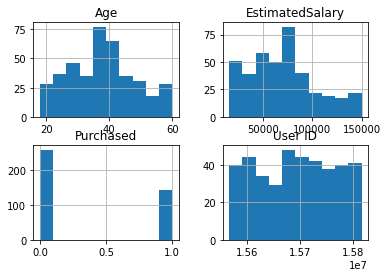

In [6]:
data.hist()

In [7]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


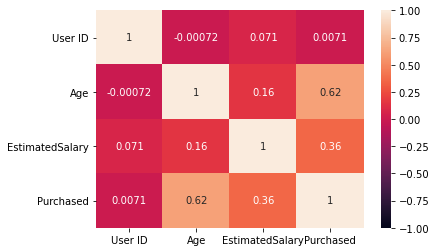

In [8]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=+1)

In [9]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x = data.iloc[:, [2, 3]].values  
y = data.iloc[:, 4].values

In [24]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2)

__RandomForestClassifier__

In [25]:
#normalize the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [26]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [27]:
#make predictions on x_test
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [28]:
#confusion_marix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cmdf = pd.DataFrame(cm,columns=['0','1'],index=['0','1'])
cmdf

,0,1
0,44,4
1,5,27


In [29]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        48
           1       0.87      0.84      0.86        32

    accuracy                           0.89        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



__Accuracy__


In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 88.75


In [ ]:
fn=iris.feature_names
cn=iris.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [51]:
from sklearn import tree

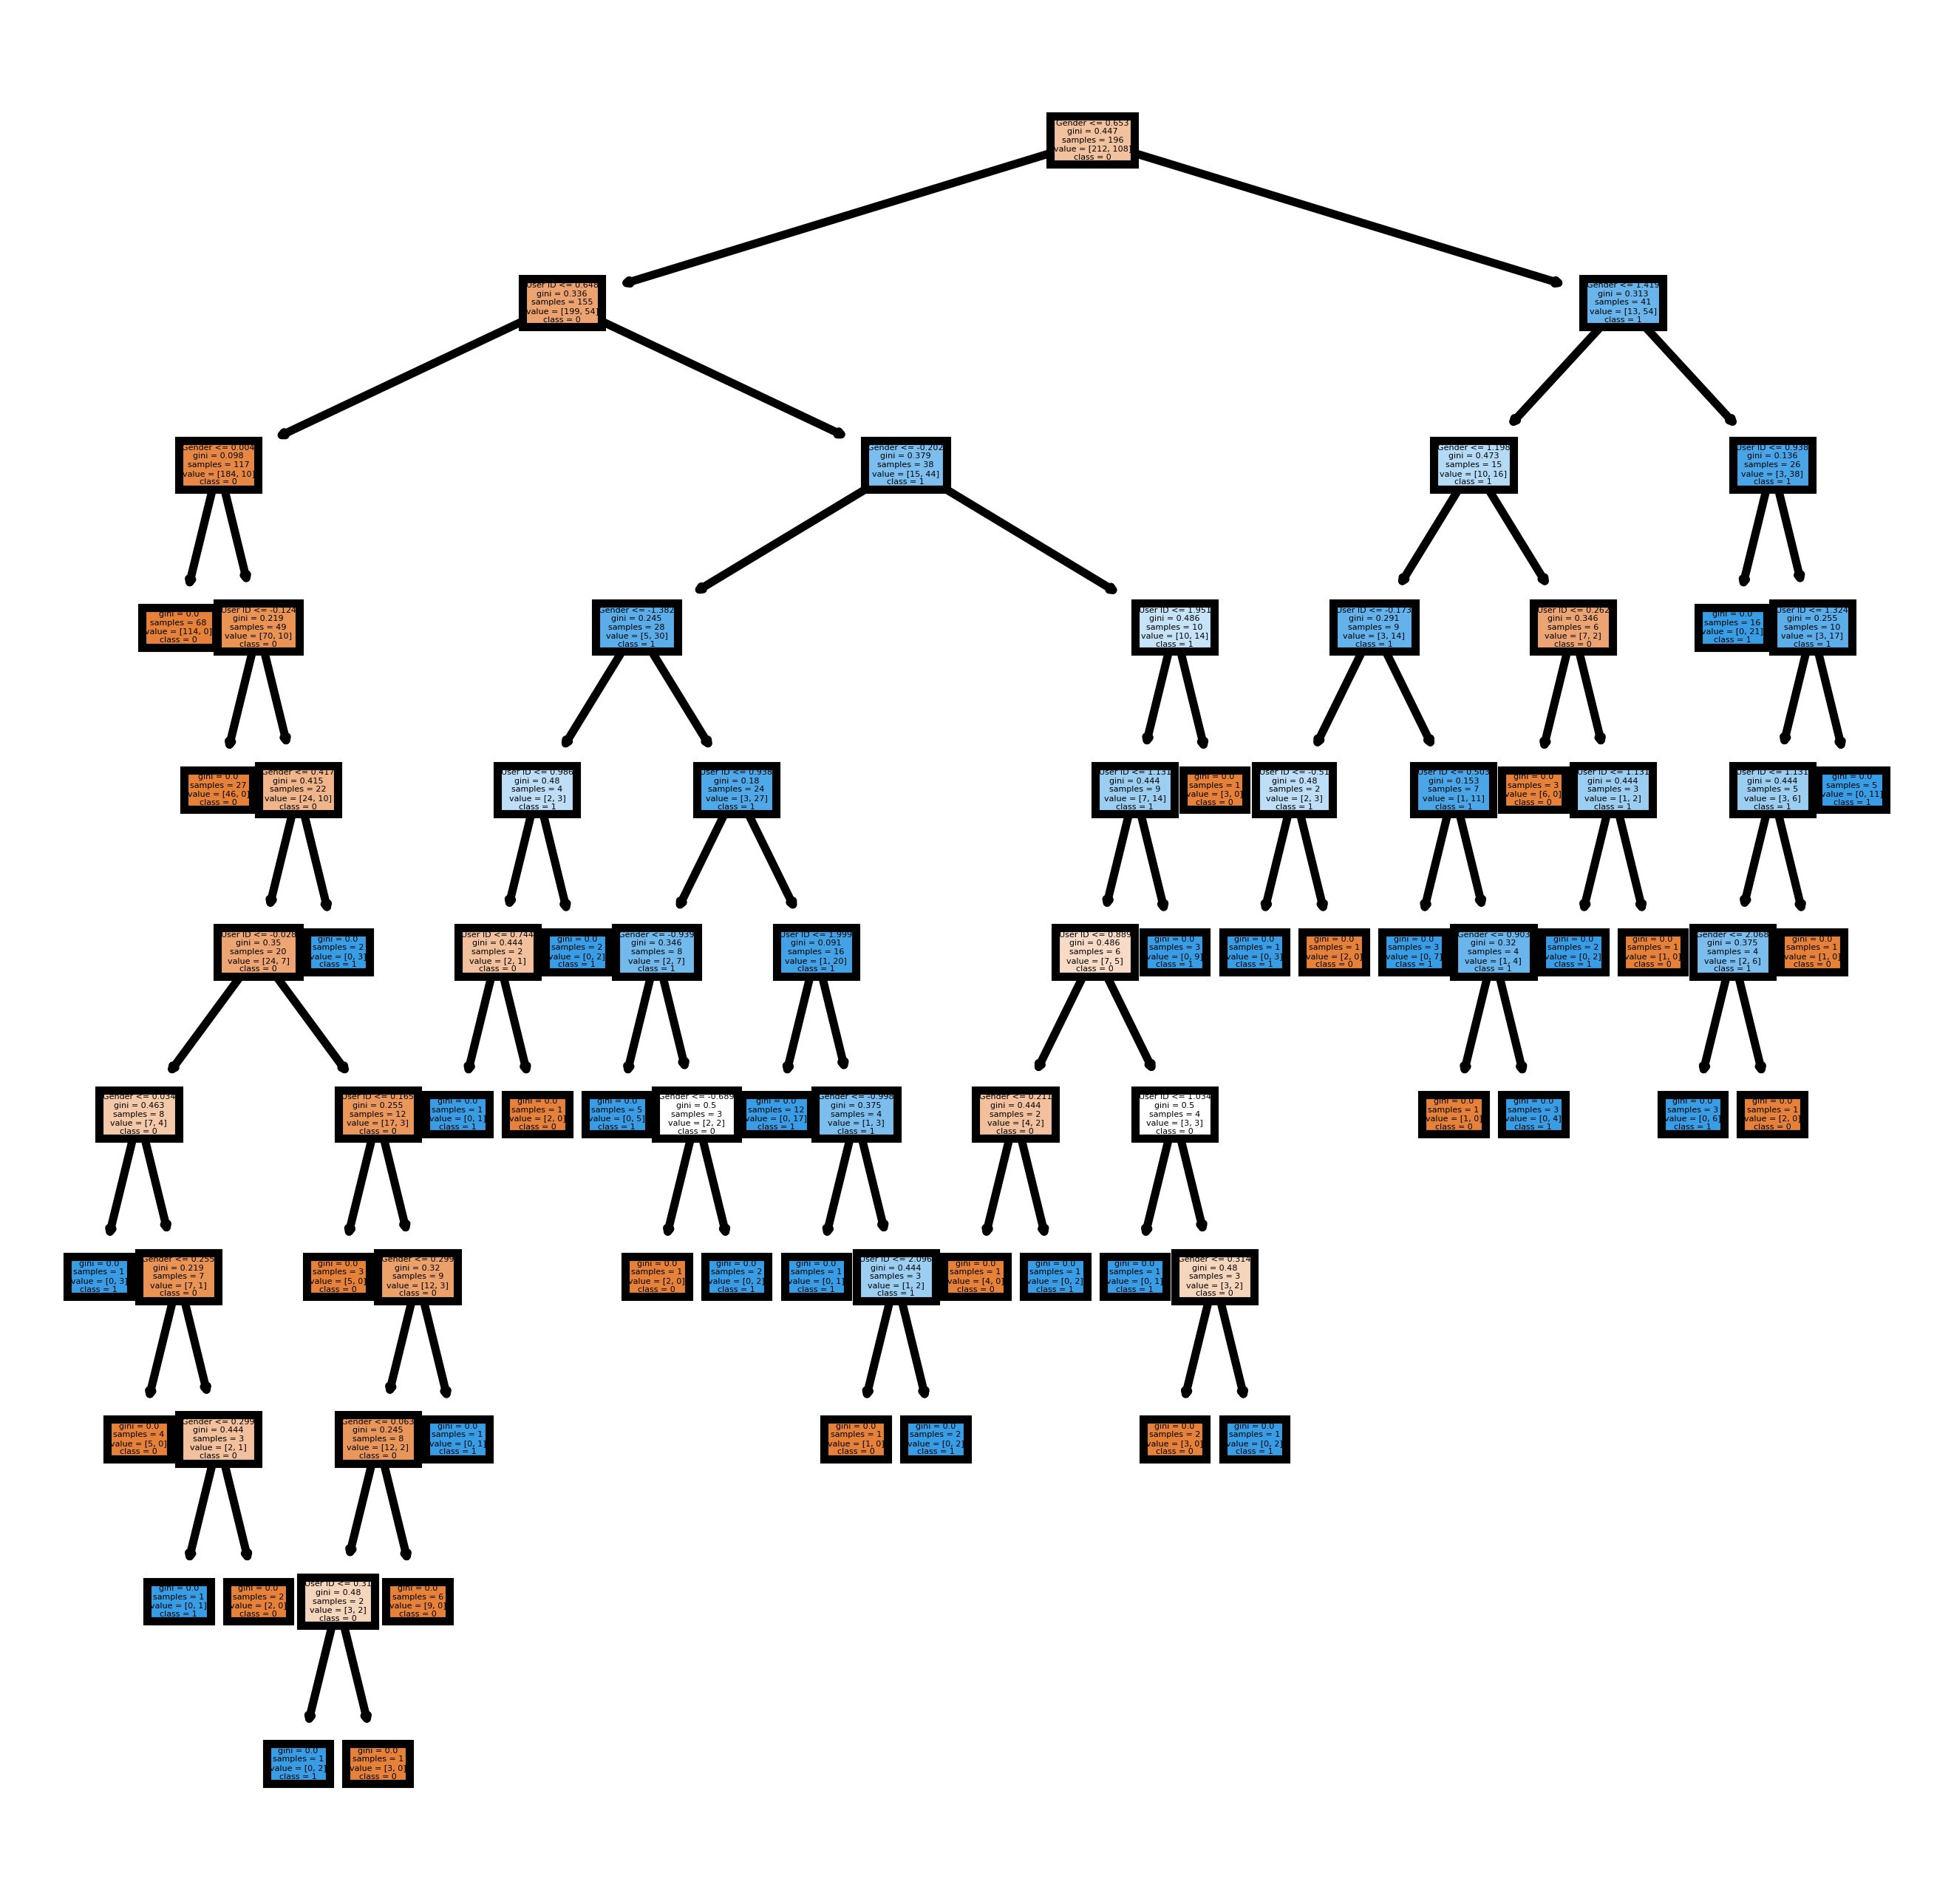

In [52]:
fn=['User ID','Gender','Age','EstimatedSalary']
cn=['0','1']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);



__Decision Trees__

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier_1 = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
#prections
ypred = classifier_1.predict(x_test)
ypred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [46]:
#confusion_marix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,ypred)
cmdf1 = pd.DataFrame(cm1,columns=['0','1'],index=['0','1'])
cmdf1

,0,1
0,43,5
1,6,26


In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,ypred)*100)

Accuracy: 86.25


In [48]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, ypred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        48
           1       0.84      0.81      0.83        32

    accuracy                           0.86        80
   macro avg       0.86      0.85      0.86        80
weighted avg       0.86      0.86      0.86        80



[Text(155.03522727272727, 210.645, 'X[0] <= 0.455\nentropy = 0.931\nsamples = 320\nvalue = [209, 111]'),
 Text(95.11363636363637, 197.055, 'X[1] <= 0.594\nentropy = 0.628\nsamples = 229\nvalue = [193, 36]'),
 Text(60.872727272727275, 183.465, 'X[0] <= -0.124\nentropy = 0.225\nsamples = 193\nvalue = [186, 7]'),
 Text(53.263636363636365, 169.875, 'entropy = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(68.48181818181818, 169.875, 'X[1] <= -0.055\nentropy = 0.488\nsamples = 66\nvalue = [59, 7]'),
 Text(60.872727272727275, 156.285, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(76.0909090909091, 156.285, 'X[1] <= 0.417\nentropy = 0.734\nsamples = 34\nvalue = [27, 7]'),
 Text(68.48181818181818, 142.695, 'X[0] <= 0.358\nentropy = 0.684\nsamples = 33\nvalue = [27, 6]'),
 Text(45.654545454545456, 129.10500000000002, 'X[1] <= 0.034\nentropy = 0.592\nsamples = 28\nvalue = [24, 4]'),
 Text(38.04545454545455, 115.515, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(53.263636363636365,

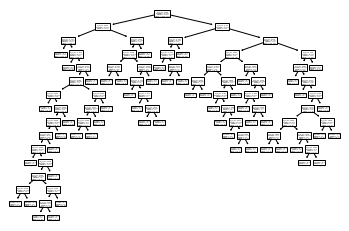

In [53]:
from sklearn import tree
tree.plot_tree(classifier_1)

In [54]:
text_representation = tree.export_text(classifier_1)
print(text_representation)

|--- feature_0 <= 0.45
|   |--- feature_1 <= 0.59
|   |   |--- feature_0 <= -0.12
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.12
|   |   |   |--- feature_1 <= -0.05
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.05
|   |   |   |   |--- feature_1 <= 0.42
|   |   |   |   |   |--- feature_0 <= 0.36
|   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |   |--- feature_0 <= 0.26
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.30
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.27
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.07
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.27
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|

__As per Accuracy values it is obvious that RandomForestClassifier has performed a little better than DecisionTreeClassifier__